# Neural Networks for Data Science Applications
## Final Homework: Putting everything together

**Name**: *Mohanraj Chandrasekar*

**Matricola**: *1921450*

Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

**Overview**: The homework is composed of four parts: (i) select a dataset; (ii) implement a custom component (ONLY if you did not submit the first homework); (iii) implement a neural network and train it on the dataset; (iv) perform a post-training operation on the method (interpretation / robustness / fairness).

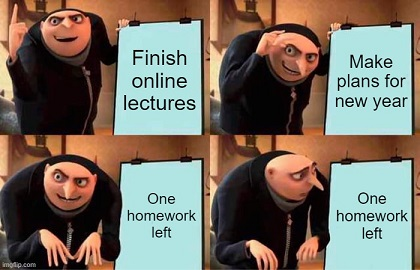

In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
!pip install tf-explain
import tf_explain as te
from tf_explain.core import GradCAM
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Important - before starting**: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*.

### Warm-up: Selecting a dataset

During the course, we were able to see only a small selection of datasets. For this homework, you are free to select any dataset that you believe interesting (images, audios, texts)... The task can be either classification or a more complex task (e.g., segmentation, sequence prediction, ...). *For tasks beyond classification, check carefully that the final exercise is viable before starting your implementation.*

A few repositories that you can look at:

1. The catalog of [TensorFlow Datasets](https://www.tensorflow.org/datasets/).
2. The [Kaggle catalog](https://www.kaggle.com/data). For downloading data from Kaggle on Google Colab, you will need to [load your Kaggle authentication token](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb).
3. The [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).

You are not bound to these; any open repository is okay. As a rule of thumb, the choice of dataset will not influence the mark, so you can select a complexity that you believe adequate to your skills.

**DESCRIPTION OF THE CODE**: *Provide a small description of the dataset here (e.g., source, task, bibliographic reference if necessary...).*

*Selected Dataset : **fashion_mnist** from Tensorflow Datasets*
https://www.tensorflow.org/datasets/catalog/fashion_mnist

Description:
The dataset contains total of 70000 grayscale images divided into train and test with each 60000 and 10000 images respectively

This problem is a image classification of dress image with 10 classes 

example:
class 0 - Tshirt/Top


In [70]:
# Insert any data loading code here. If the data loading part is complex,
# consider using a separate .py file that you can attach to the submission.

fashion, metadata = tfds.load('fashion_mnist', as_supervised=True, shuffle_files=True,with_info=True)
#to get the label name of classes
get_label_name = metadata.features['label'].int2str

In [201]:
#splitted train set into 50000 trainset and 10000 validation set
f_train = fashion['train'].skip(10000).cache().shuffle(1000).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
f_val = fashion['train'].take(10000).cache().batch(32).prefetch(tf.data.experimental.AUTOTUNE)
f_test = fashion['test'].cache().shuffle(500).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [258]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#loading separately images better for final prediction and testing output 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Exercise 1: Implement a custom object (5 points)

**This exercise is required only for students that have not submitted the mid-term homework, or for students who want to raise their mid-term mark (mark <= 3/5). For a mark of 4/5, an additional point can also be recovered during the exam.**

**To recap**: if you submitted the mid-term homework, implement only Exercises 2 and 3, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1, 2, and 3 for a total of *15 points*. 

[Papers With Code](https://paperswithcode.com/methods) is a repository of state-of-the-art tasks and components for deep networks, including:

1. [Optimizers](https://paperswithcode.com/methods/category/optimization)
2. [Residual components](https://paperswithcode.com/methods/category/skip-connection-blocks)
3. [Attention mechanisms](https://paperswithcode.com/methods/category/attention-mechanisms)
4. [Regularizers](https://paperswithcode.com/methods/category/regularization)
5. [Activation functions](https://paperswithcode.com/methods/category/activation-functions)
6. [Normalization blocks](https://paperswithcode.com/methods/category/normalization)
7. [Loss functions](https://paperswithcode.com/methods/category/loss-functions)
8. [Variants of feedforward networks](https://paperswithcode.com/methods/category/feedforward-networks)

Select a component in the categories above **not covered during the course**, and provide a working implementation in **TensorFlow 2.x**. A re-implementation is preferable; if you use an open implementation, state it clearly below. If you re-use parts of an open implementation, also state it clearly below.

**DESCRIPTION OF THE CODE**: *provide a small description of the method you have implemented, with all necessary links. If needed, explain why it is useful for the task you have selected (e.g., if implementing a different loss function).*

In [ ]:
# Insert your custom component here
class MyCustomDropout(tf.keras.Layer):
  # ...

In [ ]:
# Optionally, briefly show how the component can be used

### Exercise 2: Train on your data (5 points)

This part is straightforward: create a model, according to everything we saw in the course, and train it on the data you have loaded. If you did Exercise 1, **include your custom component here**. Otherwise, you are free to use any components that were not included in the course (layers, losses, metrics, ...), provided you give a brief description below.

**DESCRIPTION OF THE CODE**: *Provide a small description of (i) the model, (ii) the task, (iii) any notable features of your training process.*

The fashion dataset contains simple grayscale image with size 28*28 so the below is a simple Convolutional Neural Network model created using Sequential method of keras with Three convolutional 2d layers with tanh activation function and the final flattened output of convolutional layers is fed into fully connected dense layers with relu activation function and final classification with softmax classifier.

For this task referred tensorflow guide for preprocessing  and other layers tried from the simple model added extra layers.

In [42]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(28, 28, 1))),
model.add(layers.Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(28,28,1)))
model.add(layers.Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))

In [43]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 30)        8670      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 10, 10, 30)        8130      
_________________________________________________________________
flatten_7 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)              

In [45]:
model.fit(f_train,epochs=10,validation_data=f_val)

Epoch 1/10
1563/1563 [==============================] - 120s 76ms/step - loss: 0.6210 - accuracy: 0.7750 - val_loss: 0.3136 - val_accuracy: 0.8864
Epoch 2/10
1563/1563 [==============================] - 118s 76ms/step - loss: 0.3096 - accuracy: 0.8875 - val_loss: 0.2943 - val_accuracy: 0.9003
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 0.2510 - accuracy: 0.9060 - val_loss: 0.3042 - val_accuracy: 0.8981
Epoch 4/10
1563/1563 [==============================] - 118s 75ms/step - loss: 0.2112 - accuracy: 0.9194 - val_loss: 0.2863 - val_accuracy: 0.9062
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.1775 - accuracy: 0.9332 - val_loss: 0.2836 - val_accuracy: 0.9109
Epoch 6/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.1468 - accuracy: 0.9455 - val_loss: 0.2960 - val_accuracy: 0.9101
Epoch 7/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.1177 - accuracy: 0.9571 - val_loss: 0

In [242]:
test_loss, test_acc = model.evaluate(f_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 5s - loss: 0.4010 - accuracy: 0.9092

Test accuracy: 0.9092000126838684


### Exercise 3 (5 points)

Training a model is only the beginning! Select **one of the three** paths below, and follow the instructions.

1. **Interpreting your model**: interpretability is critical in many applications. Good libraries for obtaining interpetations from your model are [tf-explain](https://github.com/sicara/tf-explain), the original [LIME implementation](https://github.com/marcotcr/lime), and IBM [AIX360 Toolbox](https://github.com/Trusted-AI/AIX360). For this path, select an interpretability method, *read carefully the original paper*, and test it on one of your input examples. You can use one of the basic methods seen in the course, or a more advanced variant (e.g., Gradients*Input, Integrated Gradients, ...).

2. **Attacking your model**: there are a number of libraries for crafting an adversarial attack. Possible alternatives are [CleverHans](https://github.com/tensorflow/cleverhans), [Foolbox](https://github.com/bethgelab/foolbox), or the [Adversarial Robustness Toolbox](https://github.com/Trusted-AI/adversarial-robustness-toolbox). Select one white-box adversarial attack, *read carefully the original paper*, and create an adversarial attack on your network. You can use FGSM as seen in the course, or a more advanced method (e.g., JSMA, ...).

3. **Fairness**: finally, you might want to evaluate whether your model is fair. Good libraries for this are [FAT Forensics](https://fat-forensics.org/) or IBM [AIF360 Toolbox](https://github.com/Trusted-AI/AIF360). For this exercise, select a fairness metric, and evaluate the group fairness on your dataset. Then, apply a post-processing to enforce the fairness, and evaluate the eventual variation in accuracy.

**DESCRIPTION OF THE CODE**: *Provide a description of the method and/or library you have chosen.*

**Interpreting the Model - tf_explain**

**Gradient-weighted Class Activation Mapping (Grad-CAM)**
Referred Material is https://github.com/sicara/tf-explain

This method will Interpret the model by highlighting the important regions of image by heatmap which are used to predict the class of the particular image.

So below I have tested using one sample image and code to get 10 sample images and their corresponding Gradient Map prediction

In this part I have used it against the pretrained model (The model that fitted with the train dataset above)

In [259]:
#taking sample test image to check against GradCAM() and predictions
timg ,tlab = test_images[0],test_labels[0]

In [260]:
get_label_name(tlab),tlab

('Ankle boot', 9)

In [262]:
#predicting the test_images using model and storing for future usage
final_predictions = model.predict(test_images)

In [264]:
#checking the test dataset prediction
np.argmax(final_predictions[0])

9

In [162]:
import tf_explain as te
from tf_explain.core import GradCAM
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [265]:
img = tf.keras.preprocessing.image.img_to_array(timg)
data = ([img], None)

In [266]:
#explaining GradCAM definition and the result will be stored in image
explainer = GradCAM()
grid = explainer.explain(data, model, class_index=4) 

explainer.save(grid, ".", "grad_cam.png")

Test Image label:Ankle boot
Test Image Class:9


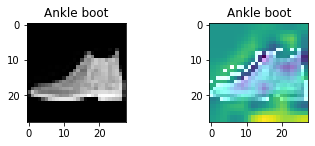

In [269]:
print("Test Image label:"+get_label_name(tlab)+"\nTest Image Class:"+str(int(tlab)))
gimg = mpimg.imread('grad_cam.png')
plt.axis('off')
f1=plt.subplot(2, 2, 1)
f1.set_title(get_label_name(tlab))
plt.imshow(timg,cmap='Greys_r')
f2=plt.subplot(2, 2, 2)
f2.set_title(get_label_name(np.argmax(final_predictions[0])))
plt.imshow(gimg)
#Image('grad_cam.png',width=200,height=200)

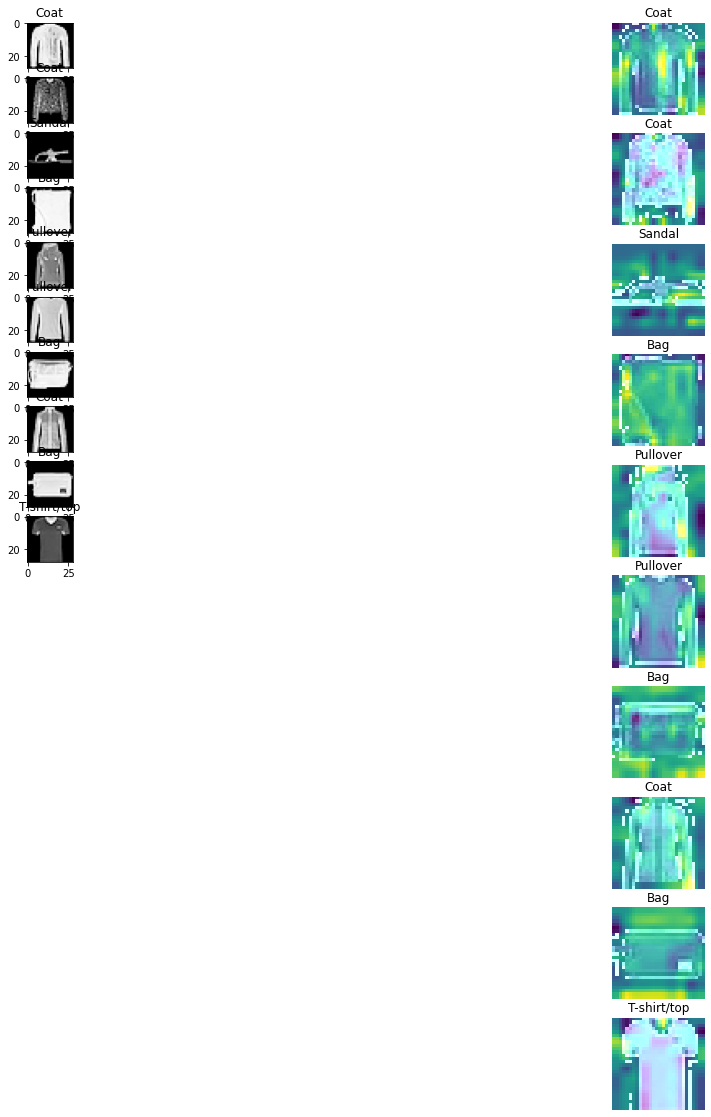

In [277]:
#plotting 10 sample images with the heatmap visualization of the corresponding images with the labels 
plt.figure(figsize=(20,20))
j=0
#loop for taking test images and their correspponding prediction
for i in range(50,60):
    f1 = plt.subplot(20,2, j+1)
    #setting image with corresponding test_label
    f1.set_title(get_label_name(test_labels[i]))
    plt.imshow(test_images[i],cmap='Greys_r')
    img_t = tf.keras.preprocessing.image.img_to_array(test_images[i])
    data = ([img_t], None)
    #using GradCAM() explaining the image with the correct class Gradient heatmap
    grid = explainer.explain(data, model, class_index=test_labels[i]) 
    #saving the image
    explainer.save(grid, ".", "test"+str(i)+".png")
    gtimg = mpimg.imread('test'+str(i)+'.png')
    f2 = plt.subplot(10,2, j+2)
    j+=2
    #setting up label name from the final prediction of corresponding test image
    f2.set_title(get_label_name(np.argmax(final_predictions[i])))
    plt.imshow(gtimg)
    plt.axis("off")

In [89]:
model.save('model.h5')

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed.
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

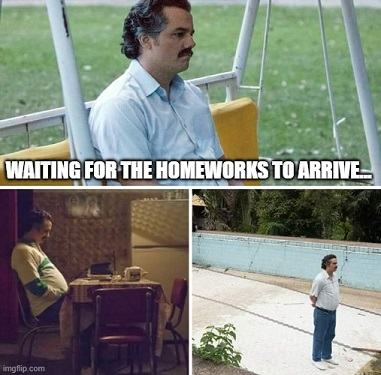